# Исследование рынка недвижимости 

## Введение


**Цель проекта:** выяснить интересные особенности и зависимости, которые существуют на рынке недвижимости Санкт-Петербурга и окрестностей.
 
- Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого **проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов.** Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


- Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.


- Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.


**Данные:**

- Архив объявлений сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

- По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


**Стадии выполнения проекта:**

- Знакомство с данными.

- Предобработка.

- Добавление новых столбцов.

- Проведение исследовательского анализа.

## Знакомство с данными

In [1]:
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# настраиваем отображение
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# загружаем датасет
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# выводим общую инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# выводим первые 20 строк
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


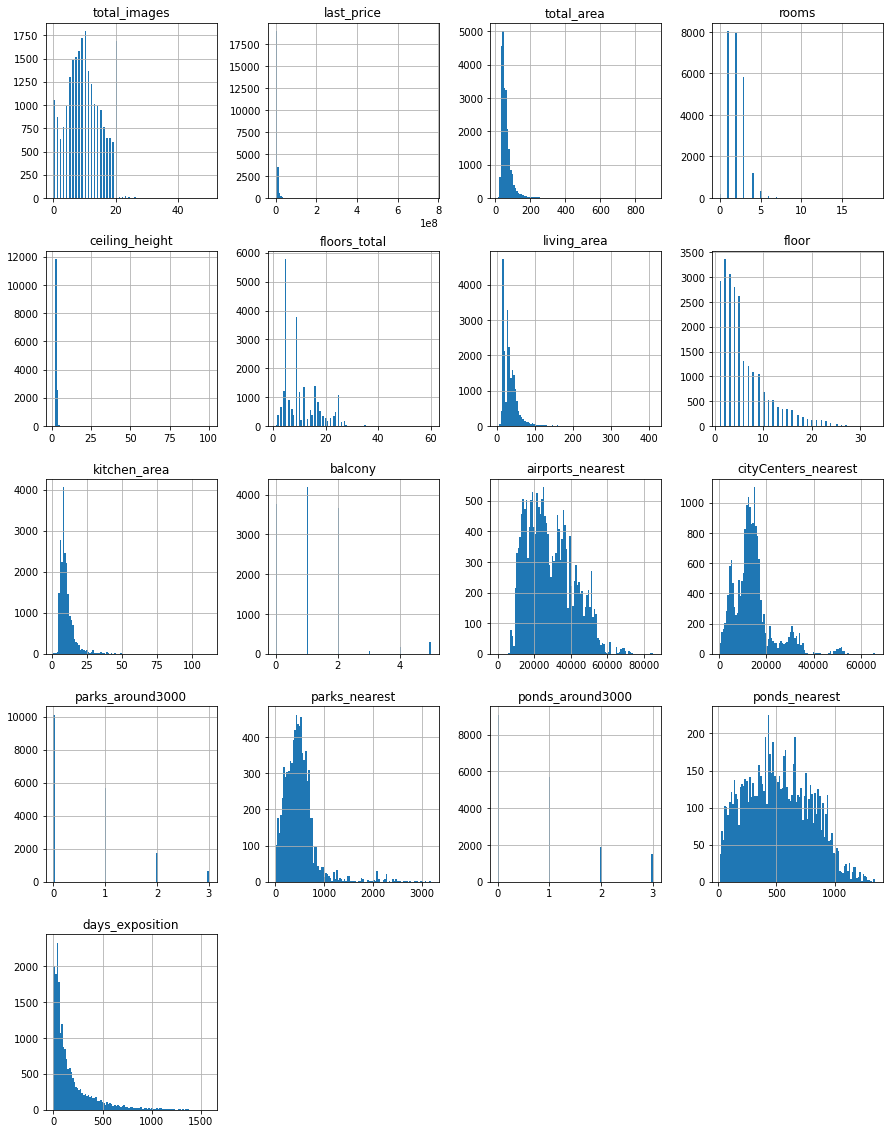

In [4]:
# строим гистограммы столбцов с числовыми данными
data.hist(bins=100,figsize=(15,20));

### Вывод по первому шагу

Изучили данные в столбцах:

**'total_images':**
   
   - Пропусков нет, нулевые значения в данных - это, видимо, отсутствие фото в объявлении, их многовато, но к нашему исследованию это отношения не имеет;
   
**'last_price':**  
   
   - Пропусков нет, на графике значения сгрудились возле нуля - скорее всего, самая распространенная  цена квартиры - до пятисот тысяч; 
   
**'total_area':**  
   
   - Пропусков нет, основная масса недвижимости - с общей площадью, видимо, до 50 м2. Но есть подозрительная область в районе, примерно, до 25м2;
   
**'first_day_exposition':** 
   
   - Пропусков нет, но у данных не временной тип. Нужно изменить;
   
**'rooms':**  
   
   - Пропусков нет, больше всего квартир с 1 и 2-мя комнатами, смущают нулевые значения. Хотя, возможно, это студии;
   
**'ceiling_height':** 
   
   - Много пропусков(39%), на графике все значения сосредоточились в районе 2,5 метров;
   
**'floors_total':**  
   
   - Пропусков почти нет, на графике предсказуемо - пики в районе, видимо, 5 и 9 этажа. Но распределение неоднородное, вопреки ожиданиям. У данных вещественный тип, нужно изменить на int;
   
**'living_area':** 
   
   - Пропусков - 8%, на графике пик около 20 м2 - видимо, самая массовая категория, смущает провал, который идет следом и значения около нуля; 

**'floor':** 
   
   - Пропусков нет, самый массовый этаж, видимо, второй. Это интересно;

**'is_apartment':** 
   
   - 88% пропущенных значений! и тип данных - строки. Будем разбираться;

**'studio':** 

   - Пропусков нет, с данными, на первый взгляд, все в порядке;

**'open_plan':** 
   
   - Пропусков нет, с данными - порядок;

**'kitchen_area':**  

   - Пропусков немного, на графике - пики в районе, наверное, 6 и 9 м2, смущает то, что ниже и нулевые значения (хотя, возможно, нулевые значения - это аппартаменты);

**'balcony':**  
   
   - Почти половина значений пропущено, вероятно, часть из них - это маркер отсутствия балкона, на графике присутствуют три, четыре и пять! балконов. С этим надо разобраться;

**'locality_name':** 

   - Пропусков почти нет, тип данных соответствующий, дальше посмотрим на аномалии; 

**'airports_nearest':** 
   
   - 34% пропусков, на графике пики в раоне 25-30 км. Довольно однородная выборка;

**'cityCenters_nearest':** 

   - Название колонки написаны "верблюжьим" регистром. 33% значений пропущено.  На графике - интересны пики в районе 30 и 50 км; 

**'parks_around3000':** 

   - Больше 30% данных пропущено. Тип данных - вещественный. Надо изменить на int. Аномально много нулевых начений (возможно, это отсутствие парка рядом с домом, но, с другой стороны, - в СПБ парки на каждом шагу. Так что выглядит странно;

**'parks_nearest':** 

   - 66% пропусков - многовато. Выборка однородна. Если есть парк, то он, практически, в пешей доступности;

**'ponds_around3000':** 

   - Пропусков больше 30%. Неподходящий тип данных - вещественный. Смущает наличие больше трех водоемов; 
 
**'ponds_nearest':** 

   -  Многовато пропусков -72%, учитывая, что в СПБ вода - везде. На графике - однородная выборка с правильным распределением и максимумом в районе 500 метров;

**'days_exposition':** 
   
   - 13% данных пропущено. Много значений нулевых значений. Есть пики в районе 40-60 дней (возможно, это связано с лимитом на бесплатное размещение объявления). Тип данных (Float) требует замены.  

## Предобработка данных

### Пропуски
- Основная причина появления пропусков в категориальных данных, на мой взгляд, в том, что авторы объявлений о продаже недвижимости не указывали некоторые параметры в объявлении:
   во многих местах пропуск означает отсутствие того или иного свойства, характеризующего недвижимость - например, балкона, водоема или парка в округе; в других местах авторы не указывали, например, апартаменты, если речь шла о квартире.


-  Заменить такие пропуски можно будет на значение False или на нулевое значение (где это возможно), в зависимости от типа данных в столбце. 


-  Что касается пропусков в числовых данных, то точную причину их появления определить сложно, а сами пропуски можно заменить на аналогичные или медианные значения окружения, если это не исказит данные.   


-  В итоге схема замены такая:

   
   **parks_around3000 и ponds_around3000** - заменим на ноль (по всей видимости, пропуск означает отсутствие парка и водоема в округе); 


   **parks_nearest и ponds_nearest** – оставим пустыми (логичную замену предложить сложно, а замена на какое-либо значение исказит данные);


   **balcony** – заменим на 0 (пропуск скорее всего - это просто отсутствие балкона);


   **ceiling_height** – оставим пропуски (доля пропусков велика и, если менять их на медиану, среднее или моду, это может существенно исказить данные, что отразится на анализе);
   
   
   **locality_name** – заменим на unknown (пропуски имеют абсолютно случайный характер);

   **is_apartment** - заменим на False (скорее всего пропуски означают, что жилое помещение – не апартаменты);


   **kitchen_area**– заменим на медианное значение доли kitchen_area от total_area (площадь кухни всегда составляет определенную долю от общей площади жилья);


   **living_area** - заменим на медианное значение доли living_area от total_area (жилая площадь всегда составляет определенную долю от общей площади помещения);


   **airports_nearest** – оставим пустыми (98% пропусков – это областные населенные пункты, а аэропорт в области один – в СПБ);      


   **city_centers_nearest** – оставим как есть (можно было бы заменить на среднее по каждому населенному пункту, но в большинстве случаев значения отсутствуют, а по СПБ пропусков очень мало);


   **days_exposition** – заменим на разницу между максимальным значением столбца first_day_exposition (это дата актуальности датасета) и значением first_day_exposition, соответствующего значению столбца days_exposition с пропуском;  
   
   
   **floors_total** – заменим на значение столбца floor, предполагая, что пропуск соответствует последнему этажу в здании (доля пропусков меньше процента, так что это не исказит данные).


In [5]:
# заменим название в столбце 'cityCenters_nearest' - изменим регистр с "верблюжьего" на "змеиный" 
data.rename(columns={"cityCenters_nearest": "city_centers_nearest"},inplace = True)
# проверяем
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# выводим пропуски
data.isna().sum().sort_values(ascending = False) 

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [7]:
# меняем пропущенные значения в столбцах parks_around3000 и ponds_around3000 и balcony на ноль
columns_to_replace = ['parks_around3000','ponds_around3000','balcony']
for column in columns_to_replace:
    data[column] = data[column].fillna(value = 0)
# проверяем
data[['parks_around3000','ponds_around3000','balcony']].isna().sum()    

parks_around3000    0
ponds_around3000    0
balcony             0
dtype: int64

In [8]:
# меняем пропуски в столбце is_apartment на False(предварительно заменив их на 0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(bool)
# проверяем
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [9]:
# меняем пропуски в столбце locality_name на unknown
data['locality_name'] = data['locality_name'].fillna('unknown')
# проверяем
data['locality_name'].isna().sum()

0

In [10]:
# меняем пропуски в столбце kitchen_area на 
# произведение медианного значения доли kitchen_area от total_area и соответствующего 
# значения total_area
k = (data['kitchen_area']/data['total_area']).median()

for d in data['total_area']:

    data.loc[(data['total_area'] == d) &
        (data['kitchen_area'].isna()), 'kitchen_area'] = d*k 
# проверяем
data['kitchen_area'].isna().sum()     

0

In [11]:
# меняем пропуски в столбце living_area на 
# произведение медианного значения доли living_area от total_area и соответствующего 
# значения total_area
l = (data['living_area']/data['total_area']).median()

for d in data['total_area']:

    data.loc[(data['total_area'] == d) &
        (data['living_area'].isna()), 'living_area'] = d*l
#проверяем
data['living_area'].isna().sum()     

0

- Меняем пропуски в столбце days_exposition на разницу между датой актуальности датасета (максимум столбца first_day_exposition) и датой первой публикации объявления.

In [12]:
# меняем тип данных в столбце first_day_exposition на дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# находим дату актуальности - максимальное значение first_day_exposition
dt = data['first_day_exposition'].max() 

# меняем пропуски в days_exposition
for d in data['first_day_exposition']:

    data.loc[(data['first_day_exposition'] == d) &
           (data['days_exposition'].isna()), 'days_exposition'] = (dt - d)/ np.timedelta64( 1 , 'D')

# проверяем 
data['days_exposition'].isna().sum()  

0

In [13]:
# меняем пропуски в столбце floors_total на значение столбца floor
for d in data['floor']:

    data.loc[(data['floor'] == d) &
           (data['floors_total'].isna()), 'floors_total'] = d
# проверяем    
data['floors_total'].isna().sum()      

0

In [14]:
# проверяем удаление пропусков
print(data.isna().sum().sort_values(ascending = False))

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
total_images                0
kitchen_area                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
open_plan                   0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
days_exposition             0
dtype: int64


In [15]:
# выводим общее инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Изменение типа данных


- Изменим тип данных в столбцах **floors_total**, **balcony**, **ponds_around3000**, **parks_around3000**, **days_exposition** на **int**, так как в выбранных столбцах должны содержаться целочисленные значения (количество этажей, балконов, парков и т.д.), это упростит анализ.


- Также ранее мы поменяли тип значений в столбцах **is_apartment** и **first_day_exposition** на соответственно **bool** и **datetime**, так как в этих содержатся логические значения и значения даты и времени.  


- Изменим тип данных в столбцах **'last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest'** с **float64 на float32** для экономии памяти.

In [16]:
# меняем значения в выбранных столбцах на int 
data[['floors_total','balcony','ponds_around3000','parks_around3000',
      'days_exposition']
    ] = data[['floors_total','balcony','ponds_around3000',
              'parks_around3000','days_exposition']].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [17]:
# меняем тип данных в выбраных столбцах с float64 на float32
data[['last_price','total_area','ceiling_height','living_area',
      'kitchen_area','airports_nearest','city_centers_nearest',
     'parks_nearest','ponds_nearest']
    ] = data[['last_price','total_area','ceiling_height','living_area',
      'kitchen_area','airports_nearest','city_centers_nearest',
     'parks_nearest','ponds_nearest']].astype('float32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

### Аномалии

In [18]:
# находим количество уникальных названий населенных пунктов
data['locality_name'].sort_values().nunique()

365

In [19]:
# выводим список названий населенных пунктов
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [20]:
# переименовываем неявные дубликаты - приводим дублирующиеся значения к единому названию
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
                
data['locality_name'] = data['locality_name'].replace(['поселок станции','городской поселок','деревня Гарболово', 
                                                       'поселок Громово', 'деревня Зимитицы', 
        'поселок Кудрово', 'поселок Любань', 'поселок Мурино',
        'село Никольское', 'село Павлово', 'деревня Рабитицы', 
        'поселок Рябово', 'деревня Федоровское', 'деревня Щеглово'
], ['поселок при железнодорожной станции','поселок городского типа','поселок Гарболово', 
     'поселок при железнодорожной станции Громово', 
     'поселок Зимитицы', 'Кудрово', 'Любань', 'Мурино', 'Никольское', 
     'поселок городского типа Павлово', 'поселок Рабитицы',
     'поселок городского типа Рябово', 'поселок городского типа Федоровское',
     'поселок Щеглово'
], regex=True)

 
# поверяем количество уникальных названий населенных пунктов
data['locality_name'].sort_values().nunique()

311

In [21]:
# проверяем список населенных пунктов
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
      

In [22]:
# ищем аномалии в столбцах таблицы
data_columns = data.columns
print(data_columns)

for column in data_columns:
    print(column, data[column].unique())

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area [108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition ['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']
rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height [  2.7     nan   3.

#### Аномалии. План замены. 

В столбце **ceiling_height**: нереалистично выглядит высота потолков (м): 
**1, 1.2, 1.75, 8, 8.3, 10.3, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100.** 

- Поменяем её таким образом:
    
   - Значения меньше 20 и значение 100 - поменяем на самое частое значение столбца - 2.5;
    
   - Значения 20, 22.6, 24, 25, 26, 27, 27.5, 32 разделим на 10, чтобы получить: **2.0, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2** соответственно. 


В столбце **room** (количество комнат): 
    
  - Поменяем значение **0 на 1**, ведь речь, скорее всего, идет об однокомнатной квартире.
    
    
В столбце **balcony**:
    
  - Удалим выбивающиеся значения **4 и 5** - любое помещение может иметь не более трех балконов, так как у любого помещения для этого максимум три стороны, четвертая - это вход. 
 
 
В столбце **price_total**:
 
  - Минимальное значение столбца: **12190.0** - явная ошибка. Учитывая метраж (109.0м2) и расположение (Санк-Петербург), квартира должна стоить в 1000 раз больше.  
    
    
В столбцах   **room** ,  **total_area**:

  - Удалим строки с выбивающимися значениями по количеству комнат (12,15) и общей площади (590м2-900м2).
    
        
В столбце   **total_area**:  
 
  - Удалим строки **с аномальным значением** (<=0) **разницы** между **общей площадью** и **суммой жилой площади и площади кухни**.    

In [23]:
# находим аномалии и их количество в столбце rooms
print(data['rooms'].value_counts())

# меняем аномальное значение (0) на (1)
data.loc[data['rooms'] == 0, 'rooms'] =  1 

# проверяем 
print(data['rooms'].unique())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


In [24]:
# находим аномалии в столбце ceiling_height
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [25]:
# меняем аномальные значения
counts = [1, 1.2, 1.75, 8, 8.3, 10.3, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100]
    
for elem in counts:
    if elem < 20 or elem == 100:
        data.loc[data['ceiling_height'] == elem, 'ceiling_height'] = 2.5
    else:
        data.loc[data['ceiling_height'] == elem, 'ceiling_height'] = elem/10
    
# проверяем     
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

In [26]:
# находим аномалии в столбце balcony
print(data['balcony'].value_counts())

# удаляем аномальные значения
data = data[data['balcony'] < 4]

# проверяем 
print(data['balcony'].unique())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64
[0 2 1 3]


In [27]:
# находим аномалии в столбце last_price
print(data['last_price'].sort_values().head(10))
print()
data[data['last_price']<20000]

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
5698     450000.0
9581     450000.0
17676    450000.0
16219    450000.0
18867    470000.0
23484    470000.0
Name: last_price, dtype: float32



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8


In [28]:
# меняем аномальные значения
wrong_value =  data['last_price'].min()

data.loc[data['last_price'] == wrong_value, 'last_price'] = wrong_value*1000

#проверяем
data['last_price'].sort_values().head(10)

17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
5698     450000.0
16219    450000.0
9581     450000.0
18867    470000.0
23484    470000.0
21912    470000.0
Name: last_price, dtype: float32

In [29]:
# находим аномально высокие значения и их количество в столбце rooms
data['rooms'].value_counts()

1     8203
2     7796
3     5565
4     1139
5      316
6      105
7       57
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

In [30]:
# выведем квартиры от 11 комнат
data[data['rooms']>11]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
866,5,25000000.0,363.000000,2017-12-23,14,3.16,5,222.000000,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418
5358,20,65000000.0,590.000000,2019-02-14,15,3.50,6,409.000000,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
14498,6,32250000.0,374.600006,2018-06-09,19,NaN,5,264.500000,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114
18848,6,28500000.0,270.000000,2015-03-02,16,3.00,4,180.000000,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365
19540,8,420000000.0,900.000000,2017-12-06,12,2.80,25,409.700012,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106
20829,6,28659000.0,245.399994,2016-03-31,14,NaN,4,168.300003,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95


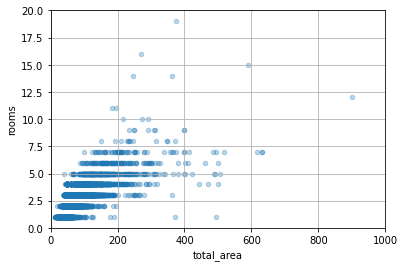

In [31]:
# посмотрим распределение rooms/total_area
data[['rooms','total_area']].plot(kind='scatter', x='total_area', y='rooms', style='o', 
                            xlim=(0,1000), ylim=(0,20), grid=True, alpha=0.3);

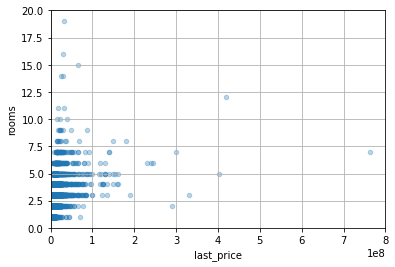

In [32]:
# посмотрим распределение rooms/last_price
data[['rooms','last_price']].plot(kind='scatter', x='last_price', y='rooms', style='o', 
                            xlim=(0,800000000), ylim=(0,20), grid=True, alpha=0.3);

In [33]:
# выведем 5-комнатную квартиру с выбивающимся значением
data.loc[(data['rooms']==5)&(data['last_price']>=400000000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393


In [34]:
# выведем квартиры площадью выше 590м2
data.loc[(data['rooms']>=7)&(data['total_area']>=590)|(data['total_area']==401)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.000000,2019-03-30,7,NaN,5,358.319611,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,34
5358,20,65000000.0,590.000000,2019-02-14,15,3.5,6,409.000000,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
12859,20,140000000.0,631.200012,2019-04-09,7,3.9,4,322.299988,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,24
14706,15,401300000.0,401.000000,2016-02-20,5,NaN,9,204.000000,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393
15651,20,300000000.0,618.000000,2017-12-18,7,3.4,7,258.000000,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111
19540,8,420000000.0,900.000000,2017-12-06,12,2.8,25,409.700012,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106


In [35]:
# выводим отсортрованный список 
print(data['total_area'].sort_values().tail(25))

# оставляем в таблице квартиры с общей площадью меньше 590м2
data = data.loc[(data['total_area'] < 590)&(data['total_area']!=401)]

# проверяем
data['total_area'].sort_values().tail(25)

5873     400.000000
15151    400.000000
12971    400.000000
14706    401.000000
14088    402.000000
13749    410.000000
14991    413.500000
22131    422.200012
3676     441.980011
20273    460.799988
6221     470.299988
660      483.899994
6621     488.000000
22494    491.000000
9826     494.100006
12401    495.000000
5893     500.000000
15016    500.000000
8018     507.000000
4237     517.000000
5358     590.000000
15651    618.000000
3117     631.000000
12859    631.200012
19540    900.000000
Name: total_area, dtype: float32


20314    374.000000
14498    374.600006
7674     380.000000
5042     380.000000
8822     398.000000
1388     399.000000
12971    400.000000
15151    400.000000
5873     400.000000
14088    402.000000
13749    410.000000
14991    413.500000
22131    422.200012
3676     441.980011
20273    460.799988
6221     470.299988
660      483.899994
6621     488.000000
22494    491.000000
9826     494.100006
12401    495.000000
15016    500.000000
5893     500.000000
8018     507.000000
4237     517.000000
Name: total_area, dtype: float32

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23206 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23206 non-null  int64         
 1   last_price            23206 non-null  float32       
 2   total_area            23206 non-null  float32       
 3   first_day_exposition  23206 non-null  datetime64[ns]
 4   rooms                 23206 non-null  int64         
 5   ceiling_height        14128 non-null  float32       
 6   floors_total          23206 non-null  int64         
 7   living_area           23206 non-null  float32       
 8   floor                 23206 non-null  int64         
 9   is_apartment          23206 non-null  bool          
 10  studio                23206 non-null  bool          
 11  open_plan             23206 non-null  bool          
 12  kitchen_area          23206 non-null  float32       
 13  balcony         

In [37]:
# ищем аномалии в распределении площади:total_area-living_area-kitchen_area
data['data_check'] = data['total_area']-data['living_area']-data['kitchen_area']
# выводим аномальные строки
data.loc[data['data_check']<=0].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,data_check
19904,4,2400000.0,12.000000,2017-07-19,1,2.55,5,10.000000,2,False,False,False,2.068965,0,Санкт-Петербург,21314.0,964.0,1,886.0,2,45.0,200,-6.896544e-02
9157,0,3400000.0,17.600000,2018-03-18,1,NaN,5,15.000000,2,False,False,False,3.034483,0,Санкт-Петербург,21555.0,1967.0,2,336.0,1,309.0,117,-4.344823e-01
21802,6,1737000.0,17.780001,2018-11-22,1,2.60,9,15.890000,1,False,False,False,3.065517,0,Санкт-Петербург,13289.0,12086.0,0,NaN,0,NaN,66,-1.175517e+00
12996,8,1900000.0,18.000000,2019-01-25,1,2.60,5,16.000000,3,False,True,False,3.103448,0,Санкт-Петербург,19573.0,15772.0,2,149.0,2,496.0,10,-1.103448e+00
8755,1,1350000.0,18.799999,2017-11-22,1,2.75,19,15.800000,1,False,True,False,3.241379,0,Санкт-Петербург,37636.0,14479.0,0,NaN,1,1127.0,128,-2.413802e-01
23191,3,1900000.0,18.900000,2016-04-04,1,NaN,16,16.000000,12,False,False,False,3.258621,0,Тосно,NaN,NaN,0,NaN,0,NaN,115,-3.586211e-01
8873,6,2950000.0,20.000000,2016-06-18,1,NaN,7,14.000000,1,False,False,False,6.000000,0,Санкт-Петербург,24053.0,4621.0,1,247.0,0,NaN,38,0.000000e+00
7755,1,1811250.0,20.670000,2016-03-28,1,2.65,24,14.950000,13,False,False,False,14.950000,1,Мурино,NaN,NaN,0,NaN,0,NaN,98,-9.230000e+00
8271,11,2300000.0,21.299999,2018-03-16,1,NaN,22,18.000000,1,False,True,False,3.672414,2,Мурино,NaN,NaN,0,NaN,0,NaN,56,-3.724146e-01
17824,10,2300000.0,22.500000,2017-09-27,1,NaN,22,20.000000,7,False,False,True,3.879310,2,Мурино,NaN,NaN,0,NaN,0,NaN,11,-1.379310e+00


In [38]:
# находим количество строк
len(data.loc[data['data_check']<=0].sort_values(by='total_area'))

177

In [39]:
# удаляем аномальные строки 
data = data[data['data_check']>0]

# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

### Вывод по второму шагу

 - Нашли, объяснили и заменили пропуски, изменили тип данных, нашли и обработали аномалии.  
 
 
 - **Удалили не более 3% строк**: 23029/23699.     

## Добавление новых столбцов

In [40]:
# добавляем столбец: цена одного квадратного метра price_per_sq_meter
data['price_per_sq_meter'] = data['last_price']/data['total_area'] 

# проверяем 
data.info()
data['price_per_sq_meter'].sort_values().head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

14911     7962.962891
4405      9615.384766
11351    10185.185547
9581     10368.663086
23477    10507.246094
23484    10561.797852
5698     10714.286133
19460    10769.230469
9471     10897.435547
15969    10925.925781
Name: price_per_sq_meter, dtype: float32

In [41]:
# добавляем столбец: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday  

# проверяем 
data.info()
data['exposition_weekday'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

3    4178
1    4072
4    3897
2    3872
0    3495
5    1871
6    1644
Name: exposition_weekday, dtype: int64

In [42]:
# добавляем столбец: месяц публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month 

# проверяем 
data.info()
data['exposition_month'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

2     2565
3     2523
4     2303
11    2288
10    2075
9     1930
6     1716
8     1688
7     1648
12    1599
1     1452
5     1242
Name: exposition_month, dtype: int64

In [43]:
# добавляем столбец: год публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# проверяем
data.info()
data['exposition_year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

2018    8269
2017    7951
2019    2787
2016    2724
2015    1170
2014     128
Name: exposition_year, dtype: int64

In [44]:
# добавляем столбец: тип этажа квартиры (значения — «первый», «последний», «другой»)

def floors_type_total(row):

    floor1 = row['floor']
    floor2 = row['floors_total']

    if floor1 == 1:
        return 'первый'

    elif floor1 == floor2:
        return 'последний'
     
    return 'другой'

     
data['floor_type'] = data.apply(floors_type_total, axis=1)

# проверяем
data.info()
data['floor_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23029 non-null  int64         
 1   last_price            23029 non-null  float32       
 2   total_area            23029 non-null  float32       
 3   first_day_exposition  23029 non-null  datetime64[ns]
 4   rooms                 23029 non-null  int64         
 5   ceiling_height        14029 non-null  float32       
 6   floors_total          23029 non-null  int64         
 7   living_area           23029 non-null  float32       
 8   floor                 23029 non-null  int64         
 9   is_apartment          23029 non-null  bool          
 10  studio                23029 non-null  bool          
 11  open_plan             23029 non-null  bool          
 12  kitchen_area          23029 non-null  float32       
 13  balcony         

другой       16839
последний     3322
первый        2868
Name: floor_type, dtype: int64

In [45]:
# добавляем столбец: расстояние до центра города в километрах (переводим из м в км) 
data['city_сenters_nearest_km'] = data['city_centers_nearest']/1000
# data.loc[data.astype(int) 

# проверяем
data.info()
data['city_сenters_nearest_km'].head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23029 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23029 non-null  int64         
 1   last_price               23029 non-null  float32       
 2   total_area               23029 non-null  float32       
 3   first_day_exposition     23029 non-null  datetime64[ns]
 4   rooms                    23029 non-null  int64         
 5   ceiling_height           14029 non-null  float32       
 6   floors_total             23029 non-null  int64         
 7   living_area              23029 non-null  float32       
 8   floor                    23029 non-null  int64         
 9   is_apartment             23029 non-null  bool          
 10  studio                   23029 non-null  bool          
 11  open_plan                23029 non-null  bool          
 12  kitchen_area             23029 n

0    16.028000
1    18.603001
2    13.933000
3     6.800000
4     8.098000
5          NaN
6    19.143000
7    11.634000
8          NaN
9    15.008000
Name: city_сenters_nearest_km, dtype: float32

In [46]:
# округляем значения до целых
data.loc[data['city_сenters_nearest_km'] > 0, 
         'city_сenters_nearest_km'
        ] = data.loc[data['city_сenters_nearest_km'] > 0, 
                     'city_сenters_nearest_km'].astype(int) 

data['city_сenters_nearest_km'].value_counts().head(20)

12.0    1469
14.0    1460
11.0    1368
13.0    1352
15.0    1336
16.0    1077
4.0      889
10.0     888
5.0      753
9.0      674
8.0      656
17.0     598
3.0      522
6.0      457
7.0      397
18.0     338
2.0      304
19.0     255
30.0     249
1.0      237
Name: city_сenters_nearest_km, dtype: int64

### Вывод по третьему шагу

- Добавили в таблицу такие столбцы: 
     
     - **price_per_sq_meter** - цена одного квадратного метра; 
     
     - **exposition_weekday** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
     
     - **exposition_month** - месяц публикации объявления;
     
     - **exposition_year** - год публикации объявления;
     
     - **floor_type** - тип этажа квартиры (значения — «первый», «последний», «другой»);
     
     - **city_сenters_nearest_km** - расстояние до центра города в километрах (перевели из м в км и округлили значения до целых).

## Исследовательский анализ данных

### Общие наблюдения

count    23029.000000
mean        59.834450
std         34.241112
min         13.000000
25%         40.000000
50%         51.500000
75%         69.000000
max        517.000000
Name: total_area, dtype: float64
0    45.0
dtype: float32


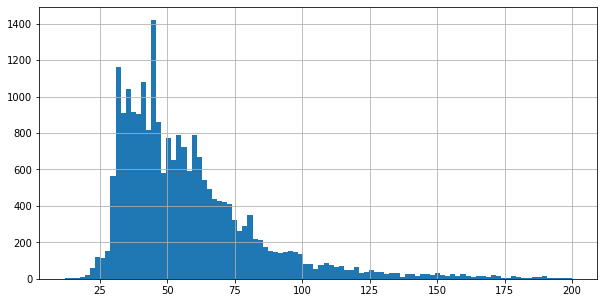

In [47]:
# изучаем общую площадь 
print(data['total_area'].describe())
print(data['total_area'].mode())
data['total_area'].hist(bins=100,figsize=(10,5), range=(12,200));

count    23029.000000
mean        34.209156
std         21.730942
min          2.000000
25%         18.860001
50%         30.000000
75%         42.000000
max        347.500000
Name: living_area, dtype: float64
0    18.0
dtype: float32


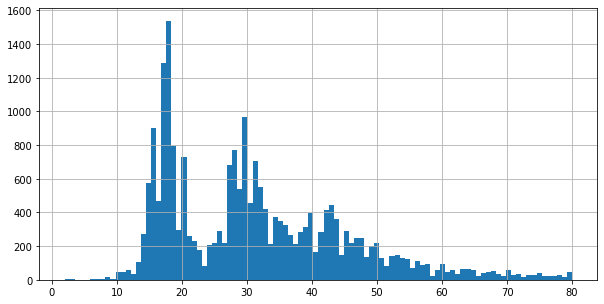

In [48]:
# изучаем жилую площадь 
print(data['living_area'].describe())
print(data['living_area'].mode())
data['living_area'].hist(bins=100,figsize=(10,5),range=(2,80));

count    23029.000000
mean        10.399219
std          5.826483
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        100.699997
Name: kitchen_area, dtype: float64
0    6.0
dtype: float32


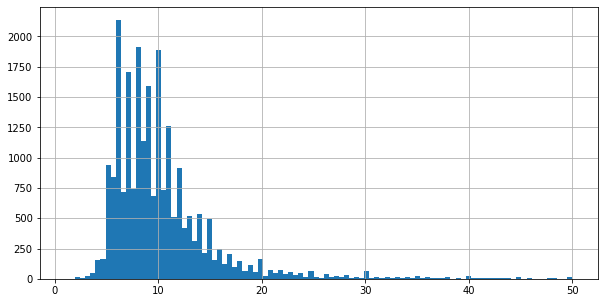

In [49]:
# изучаем площадь кухни 
print(data['kitchen_area'].describe())
print(data['kitchen_area'].mode())
data['kitchen_area'].hist(bins=100,figsize=(10,5),range=(1,50));

count        23029.0
mean       6416607.5
std        9947161.0
min         430000.0
25%        3400000.0
50%        4600000.0
75%        6700000.0
max      763000000.0
Name: last_price, dtype: float64

count    23029.000000
mean         6.416607
std          9.947161
min          0.430000
25%          3.400000
50%          4.600000
75%          6.700000
max        763.000000
Name: last_price_low, dtype: float64

0    4.5
dtype: float64


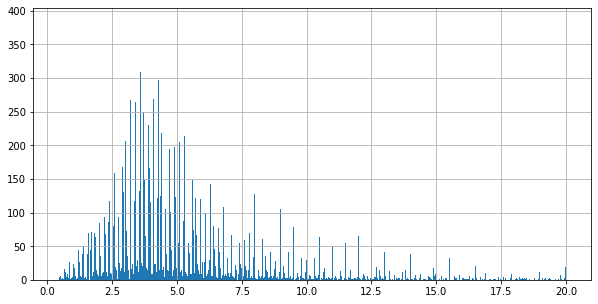

In [50]:
# изучаем параметр: цена объекта
print(data['last_price'].describe())

# укрупним масштаб, чтобы сделать данные и графики более читаемыми
data['last_price_low'] = data['last_price']/1000000
print()
print(data['last_price_low'].describe())
print()
print(data['last_price_low'].mode())
data['last_price_low'].hist(bins=1000,figsize=(10,5), range=(0.43, 20));

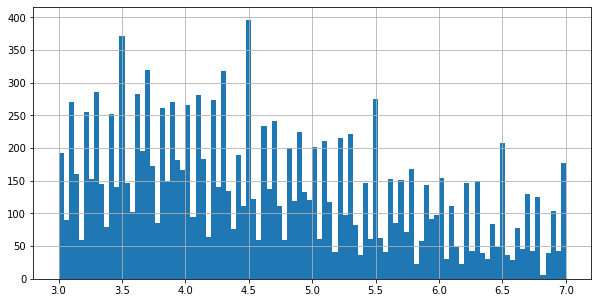

In [51]:
# посмотрим на график в пределах межквартильноо размаха
data['last_price_low'].hist(bins=100,figsize=(10,5), range=(3, 7));

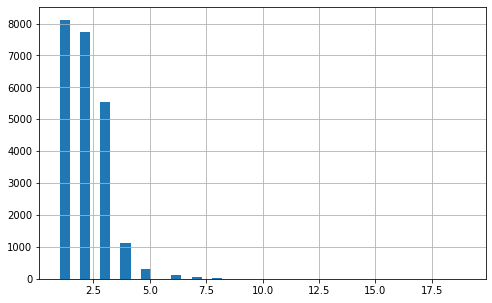

In [52]:
# изучаем количество комнат 
data['rooms'].hist(bins=40,figsize=(8,5));

count    14029.000000
mean         2.725263
std          0.277921
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64


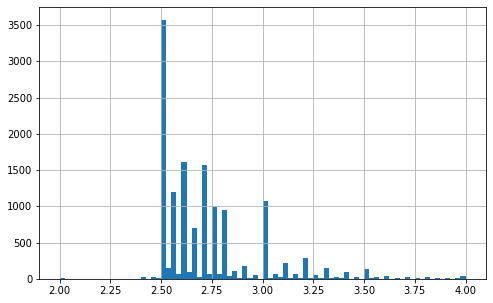

In [53]:
# изучаем высоту потолков 
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=80,figsize=(8,5),range=(2,4));

count    23029.000000
mean         5.849668
std          4.855617
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


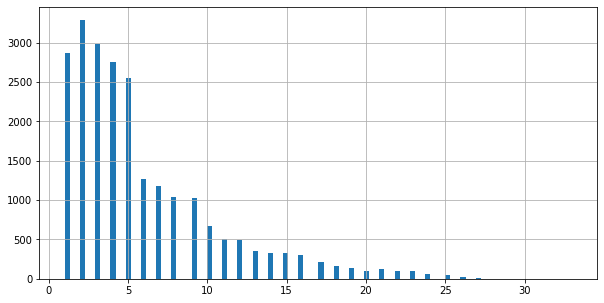

In [54]:
# изучаем этаж 
print(data['floor'].describe())
data['floor'].hist(bins=100,figsize=(10,5));

другой       16839
последний     3322
первый        2868
Name: floor_type, dtype: int64


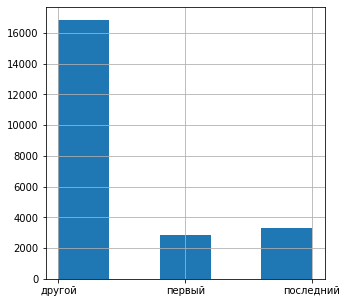

In [55]:
# изучаем тип этажа
print(data['floor_type'].value_counts())
data['floor_type'].hist(bins=5,figsize=(5,5));

count    23029.000000
mean        10.618872
std          6.577948
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


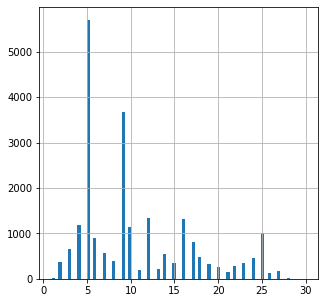

In [56]:
# изучаем этажность 
print(data['floors_total'].describe())
data['floors_total'].hist(bins=80,figsize=(5,5),range=(1,30));

count    17669.000000
mean     14187.170898
std       8622.953125
min        181.000000
25%       9210.000000
50%      13094.000000
75%      16300.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


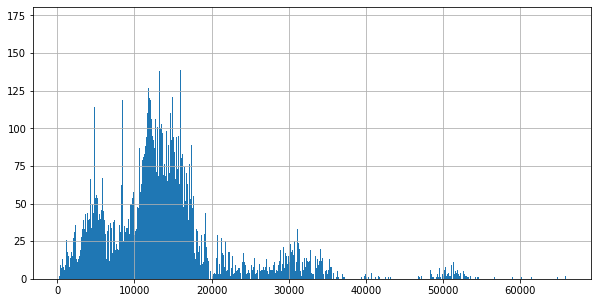

In [57]:
# изучаем удаленность от центра
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=1000,figsize=(10,5));

count    17646.000000
mean     28768.691406
std      12633.062500
min          0.000000
25%      18576.500000
50%      26629.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64


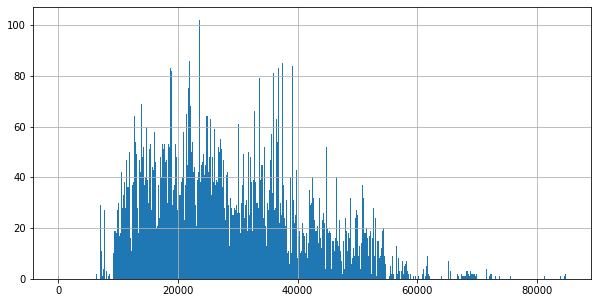

In [58]:
# изучаем удаленность от аэропорта 
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins=1000,figsize=(10,5));

count    7841.000000
mean      491.008942
std       341.945038
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


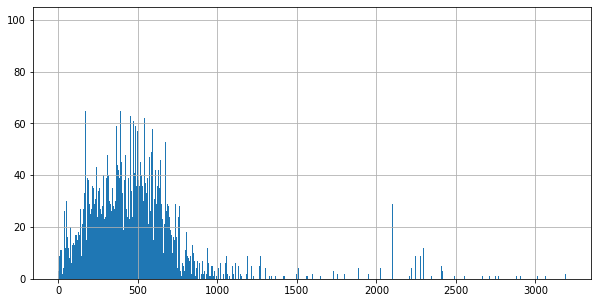

In [59]:
# изучаем удаленность от парка
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=1000,figsize=(10,5));

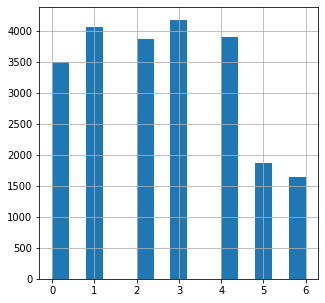

In [60]:
# изучаем день публикации  
data['exposition_weekday'].hist(bins=15,figsize=(5,5));

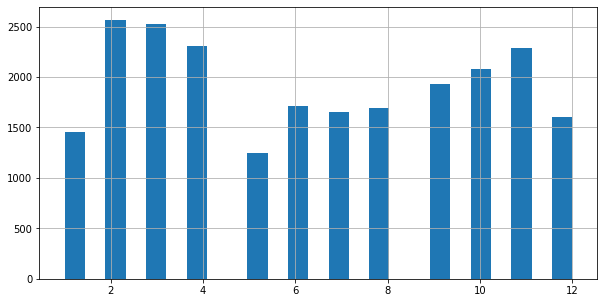

In [61]:
# изучаем месяц публикации
data['exposition_month'].hist(bins=25,figsize=(10,5));

#### Вывод

**Общая площадь:**
   - Чаще всего в выборке встречаются квартиры общей площадью 45 м2.  Среднее значение  - 59,8 м2 недалеко отстоит от медианного значения - 51,5 м2. Самая массовая категория - от 25 м2 до 50 м2. Вполне предсказуемо, учитывая самый массовый тип недвижимости в российском жилищном фонде. 

**Жилая площадь:**
 
  - Самая распространенная категория квартир - с жилой площадью 18 м2. Что соответствует средней жилой площади однокомнатной советской хрущевки. Что естественно, ведь таких квартир в выборке большинство. Среднее значение  - 34,2 м2 недалеко отстоит от медианного значения - 30 м2. Имеется провал на уровне 25 м2 и пик в районе - 30м2, что, возможно, объясняется неоднородностью планировок. 
 
**Площадь кухни:**
 
  - Наибольшее количество кухонь в выборке - площадью 6 м2, это соответствует самому массовому сегменту на рынке. Среднее значение  - 10,3 м2, медианное - 9 м2. Наибольшая по объему предложений категория: от 6м2 до 10м2. 
 
**Цена объекта:**
 
  - Цены варьируются от 4,3 млн.р.(минимальное значение) до 763 млн.р.(максимальное значение). Самое частое предложение - 4,5 млн.р.. Среднее значение - 6,42 млн.р., что почти в полтора раза больше медианы - 4,6 млн.р.. Такой разброс можно объяснить, тем, что несмотря на присутствие достаточно дорогих квартир в выборке (наибольшая  доля объявлений - из Санкт-Петербурга), самые массовые предложения  - это хрущевки небольшой площади, расположенные в советских пяти- и девятиэтажках.  
    
**Количество комнат:**
 
  - Лидеры предложений - одно-, двух- и трёхкомнатые квартиры. Однокомнатные предсказуемо встречаются чаще других. Квартиры с большим количеством комнат появляются в продаже гораздо реже.  
 
**Высота потолков:**
 
  - Самая распространенная высота потолка - 2,5 метра. Вполне естественно, ведь именно такой высоты потолки в старых пяти- и девятиэтажках. Все, что выше трех - уже редкость. Медианное значение - 2,65.   
    
 
**Этаж квартиры:**
 
  - Чаще всего в объявлениях встречаются этажи с первого по пятый. Лидер по количеству предложений - второй. Выше девятого этажа предложение гораздо скромнее.    
    
 
**Тип этажа квартиры («первый», «последний», «другой»):**
 
  - Реже всего в тройке встречается первый этаж, но это не значит, что какой-то другой этаж по отдельности встречается чаще (если не сравнивать по совокупности предложений). Очевидно только, что первый встречается реже последнего и суммарно всех других. 
    
**Общее количество этажей в доме:**
 
  - Чаще всего встречаются пяти- и девятиэтажки. Очевидно, т.к. это самый распространенный тип домов в России.
    
**Расстояние до центра города в метрах:**
 
  - Среднее расстояние от центра среди всех предложений - 14,2 км., что недалеко от медианного значения - 13 км. Самое распространенное удаление от центра - 16 км. Стандартное отклонение  - 8,6 км. Самый массовый сегмент - от 10 до 18 км. Что соответствует самым распространенным параметрам цены, метража и этажности - самые недорогие квартиры расположены далеко от центра и не являются новостройками, которые, в свою очередь, расположены еще дальше, но стоят дороже, из-за новизны и большего метража.
 
**Расстояние до ближайшего аэропорта:**
 
  - Средняя удаленность квартир от аэропорта в данных - 28,8 км. Медиана - 26,6 км. Самый массовый сегмент - от 18 до 40 км. Удаленность от аэропорта не оказывает существенного влияния на стоимость объектов, в отличие, например, от близости к метро.
     
**Расстояние до ближайшего парка:**
 
  - Распределение можно считать нормальным (там, где продавцы указывали этот параметр). Среднее удаление от ближайшего парка  - 491 метр, медианное - 455 метра, практически в шаговой доступности. Наибольшая доля значений - в диапазоне 200 - 600 м.  
     
**День публикации объявления:**
 
  - Чаще всего объявления подавали во вторник (больше всех) и четверг. Реже всего - в воскресенье (меньше всех) и субботу, что совпадает с обычным деловым недельным ритмом.
  
**Месяц публикации объявления:**
 
  - Чаще всего объявления подавали в феврале (больше всех), марте и ноябре. Реже всего - в мае (меньше всех), январе и декабре, что совпадает с изменениями обычной деловой активности в течение года.    


### Скорость продажи

count    23029.000000
mean       186.158887
std        233.844436
min          0.000000
25%         43.000000
50%         94.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64


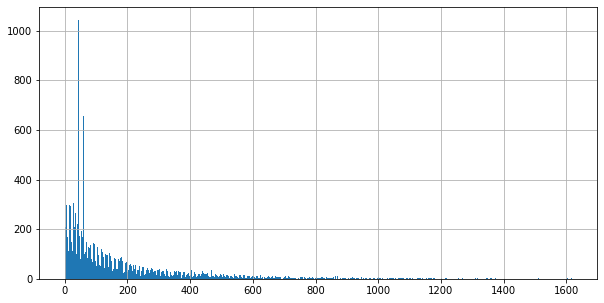

In [62]:
# выводим описание по столбцу days_exposition, чтобы оценить скорость продаж
print(data['days_exposition'].describe())
# выводим гистограмму по столбцу 
data['days_exposition'].hist(bins=1000,figsize=(10,5));

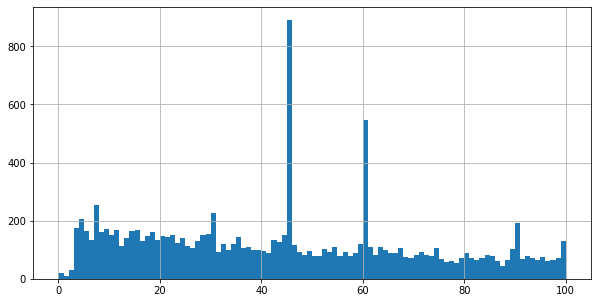

In [63]:
# выводим дополнительную гистограмму, чтобы оценить выбросы 
data['days_exposition'].hist(bins=100,figsize=(10,5), range=(0,100));

####  Вывод

 - Обычно продажа квартиры занимает 186 дней(среднее значение).
 
 - При этом половина всех квартир продавалась дольше 94 дней(медиана), а другая половина - быстрее.
 
 - **Быстрыми** продажами, можно считать длящиеся **менее 4 дней** (первый пик на гистограмме). А **необычно долгими** можно считать продажи, **которые длились** дольше **530 дней** (1,5IQR+Q3).
 
 - Пики в районе 45 и 60 дней, видимо, объясняются лимитом на бесплатное размещение объявлений. 

### Цена объекта

In [64]:
# выясним корреляцию между ценой объекта и общей площадью
data[['last_price','total_area']].corr()

,last_price,total_area
last_price,1.000000,0.633241
total_area,0.633241,1.000000


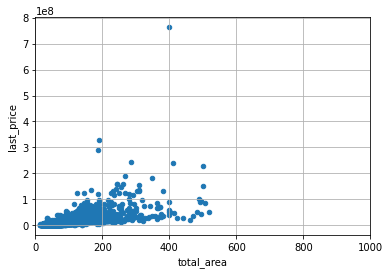

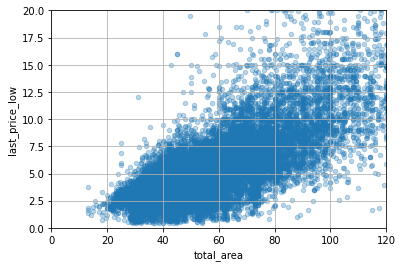

In [65]:
# построим график зависимости между ценой объекта и общей площадью
import matplotlib.pyplot as plt 

data[['last_price','total_area']].plot(kind='scatter', x='total_area', y='last_price', style='o', 
                            xlim=(0,1000), grid=True)

# посмотрим на более крупном масштабе
data[['last_price_low','total_area']].plot(kind='scatter', x='total_area', y='last_price_low', style='o', 
                            xlim=(0,120), ylim=(0,20), grid=True, alpha=0.3);

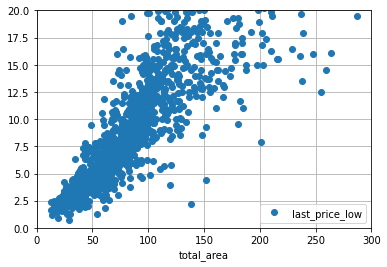

In [66]:
# построим график зависимости между усредненными значениями цен объектов и их общей площадью
price_per_total_area = (
    data
    .pivot_table(index='total_area', 
                 values='last_price_low',                 
                ).plot(style='o', 
                            xlim=(0,300), ylim=(0,20), grid=True) 
)

In [67]:
# выясним корреляцию между ценой объекта и жилой площадью
data[['last_price','living_area']].corr()

,last_price,living_area
last_price,1.000000,0.573986
living_area,0.573986,1.000000


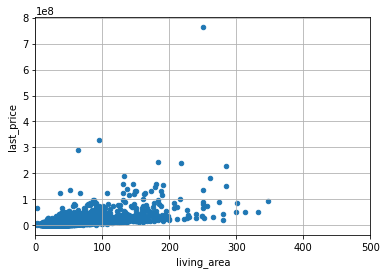

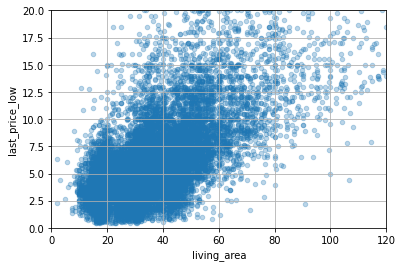

In [68]:
# построим график зависимости между ценой объекта и жилой площадью
data[['last_price','living_area']].plot(kind='scatter', x='living_area', y='last_price', style='o', 
                            xlim=(0,500), grid=True)

# посмотрим на более крупном масштабе
data[['last_price_low','living_area']].plot(kind='scatter', x='living_area', y='last_price_low', style='o', 
                            xlim=(0,120), ylim=(0,20), grid=True, alpha=0.3);

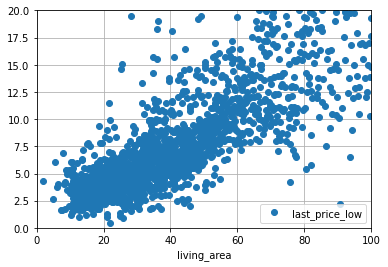

In [69]:
# построим график зависимости между усредненными значениями цен объектов и их жилой площадью
price_per_living_area = (
    data
    .pivot_table(index='living_area', 
                 values='last_price_low',                 
                ).plot(style='o', 
                            xlim=(0,100), ylim=(0,20), grid=True) 
)

In [70]:
# выясним корреляцию между ценой объекта и площадью кухни
data[['last_price','kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.514333
kitchen_area,0.514333,1.000000


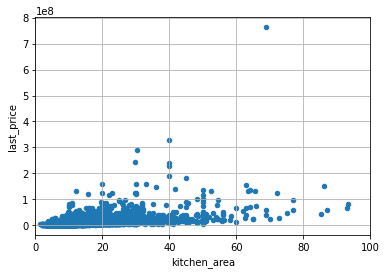

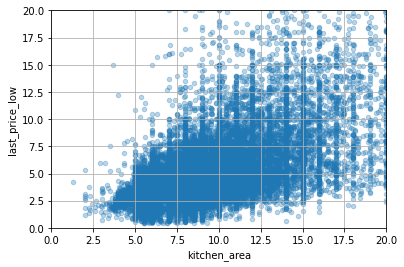

In [71]:
# построим график зависимости между ценой объекта и площадью кухни
data[['last_price','kitchen_area']].plot(kind='scatter', x='kitchen_area', y='last_price', style='o', 
                            xlim=(0,100), grid=True)

# посмотрим на более крупном масштабе
data[['last_price_low','kitchen_area']].plot(kind='scatter', x='kitchen_area', y='last_price_low', style='o', 
                            xlim=(0,20), ylim=(0,20), grid=True, alpha=0.3);

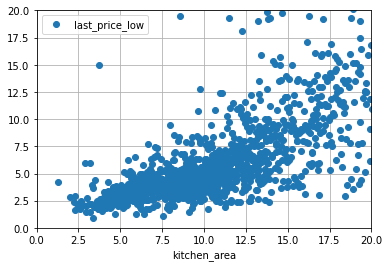

In [72]:
# построим график зависимости между усредненными значениями цен объектов и площадью их кухни
price_per_kitchen_area = (
    data
    .pivot_table(index='kitchen_area', 
                 values='last_price_low',                 
                ).plot(style='o', 
                            xlim=(0,20), ylim=(0,20), grid=True) 
)

In [73]:
# выясним корреляцию между ценой объекта и количеством комнат
data[['last_price','rooms']].corr()  

,last_price,rooms
last_price,1.000000,0.362034
rooms,0.362034,1.000000


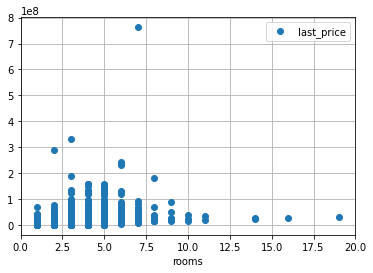

In [74]:
# построим график зависимости между ценой объекта и количеством комнат
data[['last_price','rooms']].plot(x='rooms', y='last_price', style='o', 
                            xlim=(0,20), grid=True);

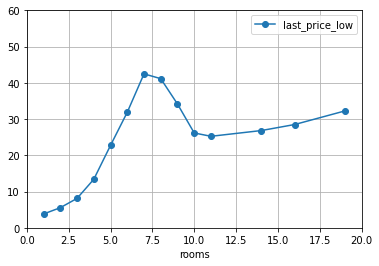

In [75]:
# построим график зависимости между усредненными значениями цен объектов и количеством комнат
price_per_rooms = (
    data
    .pivot_table(index='rooms', 
                 values='last_price_low',                 
                ).plot(style='o-', 
                            xlim=(0,20), ylim=(0,60), grid=True) 
)

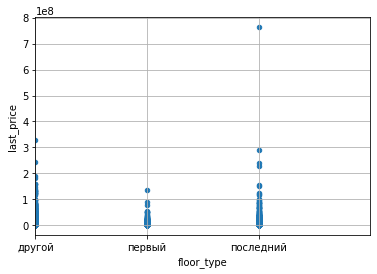

In [76]:
# построим график зависимости между ценой объекта и типом этажа
data[['last_price','floor_type']].plot(kind='scatter', x='floor_type', y='last_price', style='o', 
                            xlim=(0,3), grid=True);

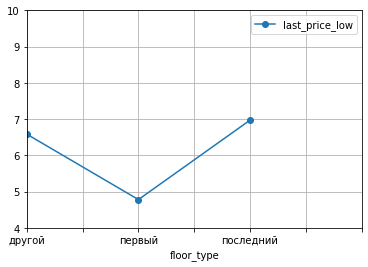

In [77]:
# построим график зависимости между усредненными значениями цен объектов и типом этажа
price_per_floor_type = (
    data
    .pivot_table(index='floor_type', 
                 values='last_price_low',                 
                ).plot(style='o-', 
                            xlim=(0,3), ylim=(4,10), grid=True) 
)

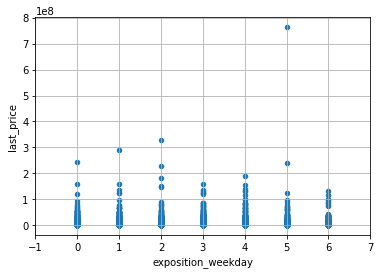

In [78]:
# построим график зависимости между ценой объекта и днем размещения объявления
data[['last_price','exposition_weekday']].plot(kind='scatter', x='exposition_weekday', y='last_price', style='o', 
                            xlim=(-1,7), grid=True);

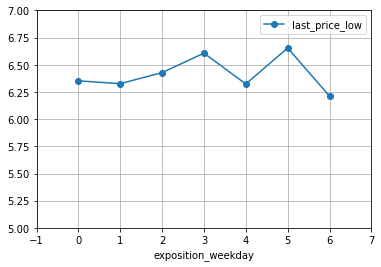

In [79]:
# построим график зависимости между усредненными значениями цен объектов и днем размещения объявления
price_per_exposition_weekday = (
    data
    .pivot_table(index='exposition_weekday', 
                 values='last_price_low',                 
                ).plot(style='o-', 
                            xlim=(-1,7), ylim=(5,7), grid=True) 
)

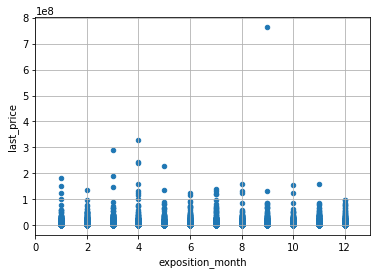

In [80]:
# построим график зависимости между ценой объекта и месяцем размещения объявления
data[['last_price','exposition_month']].plot(kind='scatter', x='exposition_month', y='last_price', style='o', 
                            xlim=(0,13), grid=True);

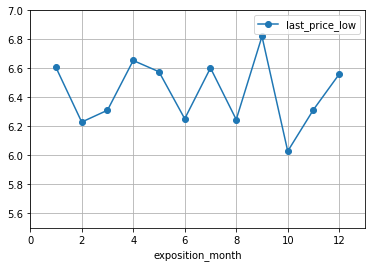

In [81]:
# построим график зависимости между усредненными значениями цен объектов и месяцем размещения объявления
price_per_exposition_month = (
    data
    .pivot_table(index='exposition_month', 
                 values='last_price_low',                 
                ).plot(style='o-', 
                            xlim=(0,13), ylim=(5.5,7), grid=True) 
)

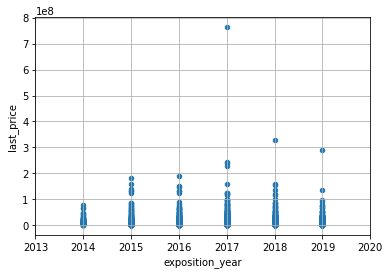

In [82]:
# построим график зависимости между ценой объекта и годом размещения объявления
data[['last_price','exposition_year']].plot(kind='scatter', x='exposition_year', y='last_price', style='o', 
                            xlim=(2013,2020), grid=True);

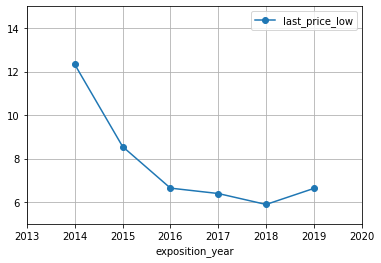

In [83]:
# построим график зависимости между усредненными значениями цен объектов и месяцем размещения объявления
price_per_exposition_year = (
    data
    .pivot_table(index='exposition_year', 
                 values='last_price_low',                 
                ).plot(style='o-', 
                            xlim=(2013,2020), ylim=(5,15), grid=True) 
)

#### Вывод

**Общая площадь** квартиры:
 - **Зависимость цены от общей площади** квартиры прямая и **высокая**: коэффициент корреляции составляет **0.633241**, что подтверждается визуально на график ах. На квартиры одинаковой площади цена может варьироваться в зависимости от других факторов, но **площадь - определяющий параметр**: как правило, **чем больше площадь, тем дороже квартира**. 
    
  
**Жилая площадь**:
         
   - Также один из параметров напрямую влияющих на конечную цену, хотя и не столь мощный, как общая площадь: **коэффициент корреляции - 0.573986**. **Рост цены** **не** такой **стремительный** растет и **разброс шире**.       
   
   
**Площадь кухни**:
       
   - Здесь зависимость еще ниже, чем у двух предыдущих параметров: **коэффициент корреляции 0.514333**. **Рост есть**, но **влияние** именно площади кухни на стоимость квартиры **не является определяющим**.             
   
   
   
**Количество комнат:** 

   - **Цена растет** прямо **пропорционально количеству комнат**. Но **коэффициент корреляции** не такой высокий: **0.362034** Зависимость есть, но она плавная. Другими словами, двухкомнатная квартира не стоит в два раза дороже однокомнатной, а трехкомнатная - в три. Боле существенную роль играет метраж.  
   
   
   
**Этаж**, на котором расположена квартира (первый, последний, другой):
       
   - **Квартиры на первом этаже** стоят значительно **дешевле** квартир на последнем и каком-либо другом этажах. 
   
      
**Дата размещения** объявления (**день недели, месяц, год**):
       
   - **День недели**: странным образом **квартиры**, размещаемые **в субботу стоят дороже**, чем предлагаемые в другие дни. Особенно в воскресенье. При этом, данный **параметр** впрямую **не влияет на цену**.
   - **Месяц**: анализ показывает, что квартиры проданные в сентябре стоят дороже остальных. Но прямая **зависимость** между ценой и месяцем продажи объявления **отсутствует**;
   - **Год**: **стоимость квартир падает** **с 2014 по 2018 год**. В период **с 2018 по 2019** годы цены на квартиры демонстрируют **умеренный рост**. Видимо, на данный показатель сильное влияние оказывают экономические факторы.   


### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [84]:
# находим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений:

# создаем группировку по столбцам locality_name и price_per_sq_meter, 
# и считаем количество объявлений и среднее значение стоимости  
price_per_m_max_ten_mean = data.pivot_table(index='locality_name', 
                                             values='price_per_sq_meter', aggfunc=['count', 'mean'])
# переименовываем столбцы 
price_per_m_max_ten_mean.columns = ['count', 'mean']

# сортируем данные, выводя десять населённых пунктов с наибольшим количеством объявлений, 
# и средней стоимостью квадратного метра  
price_per_m_max_ten_mean.sort_values(by='count',ascending = False ).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15269,114336.210938
Мурино,565,85969.609375
поселок Шушары,430,78839.398438
Всеволожск,378,68613.171875
Пушкин,359,102840.554688
Колпино,328,75330.945312
поселок Парголово,326,90135.078125
Гатчина,292,68513.679688
деревня Кудрово,290,92683.476562


In [85]:
top_city = ['Санкт-Петербург','Мурино','поселок Шушары',
             'Всеволожск','Пушкин','Колпино',
             'поселок Парголово','Гатчина',
             'деревня Кудрово','Выборг'
            ]
data_top_city = data.query('locality_name in @top_city')

# находим максимальное и минимальное значение стоимости одного квадратного метра
price_per_m_max = data_top_city['price_per_sq_meter'].max()
price_per_m_min = data_top_city['price_per_sq_meter'].min()

# находим соответствующий населенный пункт
loc_name_price_per_m_max = data_top_city.loc[data_top_city.loc[:,
                                                               'price_per_sq_meter'] == price_per_m_max, 
                                             'locality_name'
                                            ]
loc_name_price_per_m_min = data_top_city.loc[data_top_city.loc[:,
                                                               'price_per_sq_meter'] == price_per_m_min,
                                             'locality_name'
                                            ]

print(price_per_m_max)
print(loc_name_price_per_m_max)
print()
print(price_per_m_min)
print(loc_name_price_per_m_min)

1907500.0
12971    Санкт-Петербург
Name: locality_name, dtype: object

10507.246
23477    Гатчина
Name: locality_name, dtype: object


#### Вывод
 
- Наибольшее количество объявлений было размещено в следующих десяти городах: 
   
   
         locality_name	     count	         mean
        Санкт-Петербург	     15269	114336.210938
                 Мурино	       565	 85969.609375
         поселок Шушары	       430	 78839.398438
             Всеволожск	       378	 68613.171875
                 Пушкин	       359	102840.554688
                Колпино	       328	 75330.945312
      поселок Парголово	       326	 90135.078125
                Гатчина	       292	 68513.679688
        деревня Кудрово	       290	 92683.476562
                 Выборг	       233	 58356.117188
                 

- Безусловный **лидер** (с большим отрывом) **по количеству** выставляемых на продажу **квартир** - **Санкт-Петербург**.  


- Обращает на себя внимание распределение средней стоимости м2. Вопреки ожиданию, стоимость м2 в Санкт-Петербурге ненамного отличается от этого показателя у ближайших преследователей (Пушкин, поселок Парголово, деревня Кудрово). 
  
  
- **Город из топ-10**, где **стоимость м2** является **максимальной** (**1 907 500р**.) - **Санкт-Петербург**,


- Населенный пункт из **топ-10** с **минимальной стоимостью  м2** является максимальной (**10 507.246р.**) - **Гатчина.**

### Средняя стоимость м2 в Санкт-Петербурге в зависимости от расстояния до центра

In [86]:
# выделим квартиры в Санкт-Петербурге (locality_name )
# и вычислим среднюю цену каждого километра (price_per_sq_meter) 
# по мере удаленности от центра cityCenters_nearest_km:
# сделаем срез, создадим сводную таблицу, а затем построим график
price_per_km_spb_mean = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_сenters_nearest_km', 
                                             values='price_per_sq_meter',
                 aggfunc=['count', 'mean']
                )        
)
# переименовываем столбцы
price_per_km_spb_mean.columns = ['price_count', 'price_mean']

print(price_per_km_spb_mean.describe())
price_per_km_spb_mean.head(30)

       price_count     price_mean
count    30.000000      30.000000
mean    507.033333  111610.976562
std     504.501836   27580.365234
min       2.000000   62482.406250
25%      76.500000   93026.326172
50%     350.500000  106736.156250
75%     848.000000  131408.900391
max    1467.000000  180736.453125


,price_count,price_mean
city_сenters_nearest_km,,
0.0,83,180736.453125
1.0,235,166333.765625
2.0,304,142013.796875
3.0,518,129288.445312
4.0,880,136422.578125
5.0,752,145877.953125
6.0,457,150205.546875
7.0,397,140574.375000
8.0,650,119479.421875


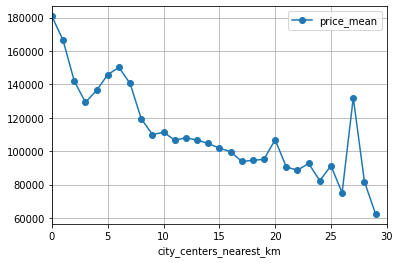

In [87]:
# построим график зависимости цены м2 от расстояния до центра СПБ
price_per_km_spb_mean.plot(y='price_mean', style='o-', 
                            xlim=(0,30), grid=True); 


In [88]:
# вычислим, на сколько в среднем растет стоимость м2 каждый км в СПБ по мере удаленности от центра
print(price_per_km_spb_mean['price_mean'].max())
print(price_per_km_spb_mean['price_mean'].min())
print((price_per_km_spb_mean['price_mean'].max()-price_per_km_spb_mean['price_mean'].min())/29)

180736.45
62482.406
4077.7257543103447





#### Вывод

  -  Средняя **стоимость квадратного метра** жилья в Санкт-Петербурге предсказуемо **повышается** по мере приближения **к центру города**. 
    
    
  -  **В самом центре** недвижимость в выборке стоит **180 736р./м2.** **На** максимальном (в выборке) **удалении** от центра - **29 км.** - этот показатель составляет **62 482 р./м2** почти на 67% дешевле. 
    
    
   -  **Каждый километр** по мере удаления от центра **недвижимость** в Санкт-Петербурге **теряет** в цене **4077,73 р.**
    

## Общий вывод

**В ходе работы над проектом мы:**
  
- Загрузили данные, изучили общую информацию и построили гистограмму для всех столбцов таблицы.  
   
  
- Провели предобработку: заполнили пропуски, обработали аномалии, заменили тип данных, где это было необходимо, выявили и обработали аномальные значения.


- Добавили в таблицу новые столбцы.
   

- Провели полноценный исследовательский анализ данных:
   
   - Изучили параметры объектов.
        
   - Изучили, как быстро продавались квартиры.    
   
   - Изучили факторы, больше всего влияющие на общую (полную) стоимость объекта.
         
   - Подсчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений  
       
   - Подсчитали среднюю цену каждого километра до центра в Санкт-Петербурге.
       

**Резюме:**
- **Самая массовая** категория квартир - это квартиры общей площадью от **45 м2.**, жилой - 18 м2, площадью кухни - 6 м2, с высотой потолков 2,5 метра, **однокомнатные**, расположенные **на втором этаже** в пяти- и девятиэтажках, полной стоимостью **4 500 000 р.**, находящиеся **в Санкт-Петербурге**. 

- Максимальное давление на цену квартиры оказывает ее общая площадь. 

- **Цены** на квартиры **с 2014 года падают**. 

- **Максимальное** количество **предложений** - в **Санкт-Петербурге**, максимальная **стоимость** квадратного метра - там же, **в центре города**.   